In [1]:
library(dplyr)
library(ggplot2)

data1 = read.table('211108LovA.tab', header = 1, stringsAsFactors = FALSE, sep = '\t')%>% mutate(Dataset = 1)
data2 = read.table('210423Lov_210505Lov.tab', header = 1, stringsAsFactors = FALSE, sep = ',') %>% mutate(Dataset = 2)

data1$lane = 1
data2$lane = 2
 
data =rbind(data1, data2)



Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.1.3"


In [2]:
head(data)

,X,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,MUTATED_INVARIANT,INDELS,LOCUS,V_CALL,...,FWR4_IMGT,CDR1_IMGT,CDR2_IMGT,CDR3_IMGT,CONSCOUNT,ID,BYTEID,CORRECTED_ID,Dataset,lane
,<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,0,1TTATGNAACTCATAGCTCGG,TANAAGGCCTCNAGACNAAGCCAATANAACTTCTCCCTCATTCTGGAGTTGGCTACCCCCTCTCAGACATCAGTGTACTTCTGTGCCAGCGGCACTGGAGGGGACTATGANNTNTACTTCGGTCCCGGCACNAGGCTCACGTGCTGAT,TRUE,TRUE,FALSE,NA,FALSE,TRB,"TRBV13-2*01,TRBV13-2*02,TRBV13-2*03",...,TTCGGTCCCGGCACNAGGCTCACG,....................................,..............................,GCCAGCGGCACTGGAGGGGACTATGANNTNTAC,4,TTATGNAACTCATAGCTCGG,bTTATGNAACTCATAGCTCGG,bTTATGTAACTCATAGCTCGG,1,1
2,1,1CCGTANGCACCGTGCTTTTC,AGAGCCACCCTTGACACCTCCAGCCAGAGCAGCTCCTTGTCCATCACTGCTACTCGGTGTGAAGACACCGCTGTGTACTTCTGTGCTACTGACACAAATGCTTACAAAGTCATCTTTGGAAAAGGGACACATCTTCATGTTCTCCGTT,TRUE,TRUE,FALSE,NA,FALSE,TRA,"TRAV8-1*01,TRAV8-1*03,TRAV8D-1*01",...,GTCATCTTTGGAAAAGGGACACATCTTCATGTTCTCC,....................................,..............................,TTCTGTGCTACTGACACAAATGCTTACAAA,5,CCGTANGCACCGTGCTTTTC,bCCGTANGCACCGTGCTTTTC,bCCGTACGCCCCGTGCTTTTC,1,1
3,2,3CCGTANGCACCGTGCTTTTC,TTCTTGAACAAAAGCGGCAAACACTTCTCACTGCACATCACAGCCTCCCAGCCTGAAGACACAGCAGTGTACCTCTGCGCAGCAGGTGGCAATAATGCAGGTGCCAAGCTCACATTCGGAGGGGGAACAAGGTTAACGGTAAGCCGCG,TRUE,TRUE,FALSE,NA,FALSE,TRA,TRAV19*01,...,CTCACATTCGGAGGGGGAACAAGGTTAACGGT,....................................,..............................,CTCTGCGCAGCAGGTGGCAATAATGCAGGTGCCAAG,10,CCGTANGCACCGTGCTTTTC,bCCGTANGCACCGTGCTTTTC,bCCGTACGCCCCGTGCTTTTC,1,1
4,3,3TATAGNGAAAATAAGAACTA,NTAANTAAGAGCAGCAGNTNNTTCNATNTGNATAAGTCCTCAGCGCAGGTGTCAGACTCTGCCCTTTAATACTGTGCTCTTACCATATATACAGAAGGTGCAGATATACTCACCTTTGGGAAAGGAACTCAGCTGATCATGAAGGCGA,FALSE,TRUE,TRUE,NA,FALSE,TRA,"TRAV12-2*01,TRAV12D-1*01,TRAV12D-1*02",...,CTCACCTTTGGGAAAGGAACTCAGCTGATCAT,....................................,..............................,TACTGTGCTCTTACCATATATACAGAAGGTGCAGATATA,4,TATAGNGAAAATAAGAACTA,bTATAGNGAAAATAAGAACTA,bTATAGAGAAAATAAGAACTA,1,1
5,4,19TATAGNGAAAATAAGAACTA,ATCCATAAGTGGAGCAGCTCATTCCATGTGCAGATGTCCTCAGNGNAGGTGTAAGACTCTGCCATTTACTAGTNTGCTCTGACCATNTATACAGAAGGTGAAGATATTCTTTCCTTTGGGAAAGGAACTCAGCTGATCATGAAGGCGT,FALSE,TRUE,TRUE,NA,FALSE,TRA,"TRAV12-1*01,TRAV12-1*05,TRAV12-2*01",...,CTTTCCTTTGGGAAAGGAACTCAGCTGATCAT,....................................,..............................,TAGTNTGCTCTGACCATNTATACAGAAGGTGAAGATATT,3,TATAGNGAAAATAAGAACTA,bTATAGNGAAAATAAGAACTA,bTATAGAGAAAATAAGAACTA,1,1
6,5,18TATAGNGAAAATAAGAACTA,CTCCATAAGAGCAGCAGCTCCTTCCATCTGCAGAAGTCCTCAGCGCAGCTGTCAGACTCTGCCCTGTACTACTGTGCTCTGACCAGATATACAGAAGGTGCAGATAGACTCNCCTTTGGGAAAGGAACTCAGCTGATCNCCCCCCCCN,TRUE,TRUE,FALSE,NA,FALSE,TRA,"TRAV12-2*01,TRAV12D-1*01,TRAV12D-1*02",...,CTCNCCTTTGGGAAAGGAACTCAGCTGATC,....................................,..............................,TACTGTGCTCTGACCAGATATACAGAAGGTGCAGATAGA,6,TATAGNGAAAATAAGAACTA,bTATAGNGAAAATAAGAACTA,bTATAGAGAAAATAAGAACTA,1,1


In [3]:
data = data  %>% rename(CLUSTER_ID = SEQUENCE_ID) %>% filter(BYTEID == CORRECTED_ID)

In [4]:
dim(data)

[1] 3337911      58

In [5]:
data$BC_UMI = gsub(x = data$CLUSTER_ID, pattern = '[^A-Z.-]', replacement = '')
data$BC = substring(data$BC_UMI, 1, 12)
data$UMI = substring(data$BC_UMI, 13, 20)
data$CLUSTER = gsub(x = data$CLUSTER_ID, pattern = '[^0-9.-]', replacement = '')                  
head(data %>% select(CLUSTER_ID, BC_UMI, BC, UMI, CLUSTER))

,CLUSTER_ID,BC_UMI,BC,UMI,CLUSTER
,<chr>,<chr>,<chr>,<chr>,<chr>
1,1TTATCACTGAATCTCTCTTG,TTATCACTGAATCTCTCTTG,TTATCACTGAAT,CTCTCTTG,1
2,3TTATCACTGAATCTCTCTTG,TTATCACTGAATCTCTCTTG,TTATCACTGAAT,CTCTCTTG,3
3,2TTATCACTGAATCTCTCTTG,TTATCACTGAATCTCTCTTG,TTATCACTGAAT,CTCTCTTG,2
4,8TTATCACTGAATCTCTCTTG,TTATCACTGAATCTCTCTTG,TTATCACTGAAT,CTCTCTTG,8
5,7TTATCACTGAATCTCTCTTG,TTATCACTGAATCTCTCTTG,TTATCACTGAAT,CTCTCTTG,7
6,6TTATCACTGAATCTCTCTTG,TTATCACTGAATCTCTCTTG,TTATCACTGAAT,CTCTCTTG,6


In [6]:
summary_frame = data %>% group_by(lane, BC_UMI) %>% summarize(nReads = sum(CONSCOUNT))
head(summary_frame)

`summarise()` has grouped output by 'lane'. You can override using the `.groups` argument.


lane,BC_UMI,nReads
<dbl>,<chr>,<int>
1,AAAAAAAAAAAAAAAAAAAA,3
1,AAAAAAAAATACACATTAAT,25
1,AAAAAAAAATGACCAAGCCG,3
1,AAAAAAAACAAGACAAAAAA,3
1,AAAAAAAACCTGTTCAAAAC,3
1,AAAAAAAACCTTTGGATAAG,5


In [7]:
summary_frame$id = paste0(summary_frame$lane, summary_frame$BC_UMI)
data$id = paste0(data$lane, data$BC_UMI)


In [8]:
head(summary_frame)

lane,BC_UMI,nReads,id
<dbl>,<chr>,<int>,<chr>
1,AAAAAAAAAAAAAAAAAAAA,3,1AAAAAAAAAAAAAAAAAAAA
1,AAAAAAAAATACACATTAAT,25,1AAAAAAAAATACACATTAAT
1,AAAAAAAAATGACCAAGCCG,3,1AAAAAAAAATGACCAAGCCG
1,AAAAAAAACAAGACAAAAAA,3,1AAAAAAAACAAGACAAAAAA
1,AAAAAAAACCTGTTCAAAAC,3,1AAAAAAAACCTGTTCAAAAC
1,AAAAAAAACCTTTGGATAAG,5,1AAAAAAAACCTTTGGATAAG


In [9]:
data = as.data.frame(data)
data$nUMI_reads = summary_frame[match(data$id, summary_frame$id), 'nReads']$nReads

In [10]:
data = data %>% mutate(UMI_FRAC = CONSCOUNT/nUMI_reads) 
summary(data$UMI_FRAC)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000014 0.0003682 0.0037192 0.1763717 0.0967742 1.0000000 

In [11]:
data$AMBIG = FALSE
data$AMBIG[grep(pattern = 'N', x = data$JUNCTION)] = TRUE
table(data$AMBIG)



  FALSE    TRUE 
2433273  904638 

In [12]:
seurat = readRDS('../pre_naive_out.RDS')


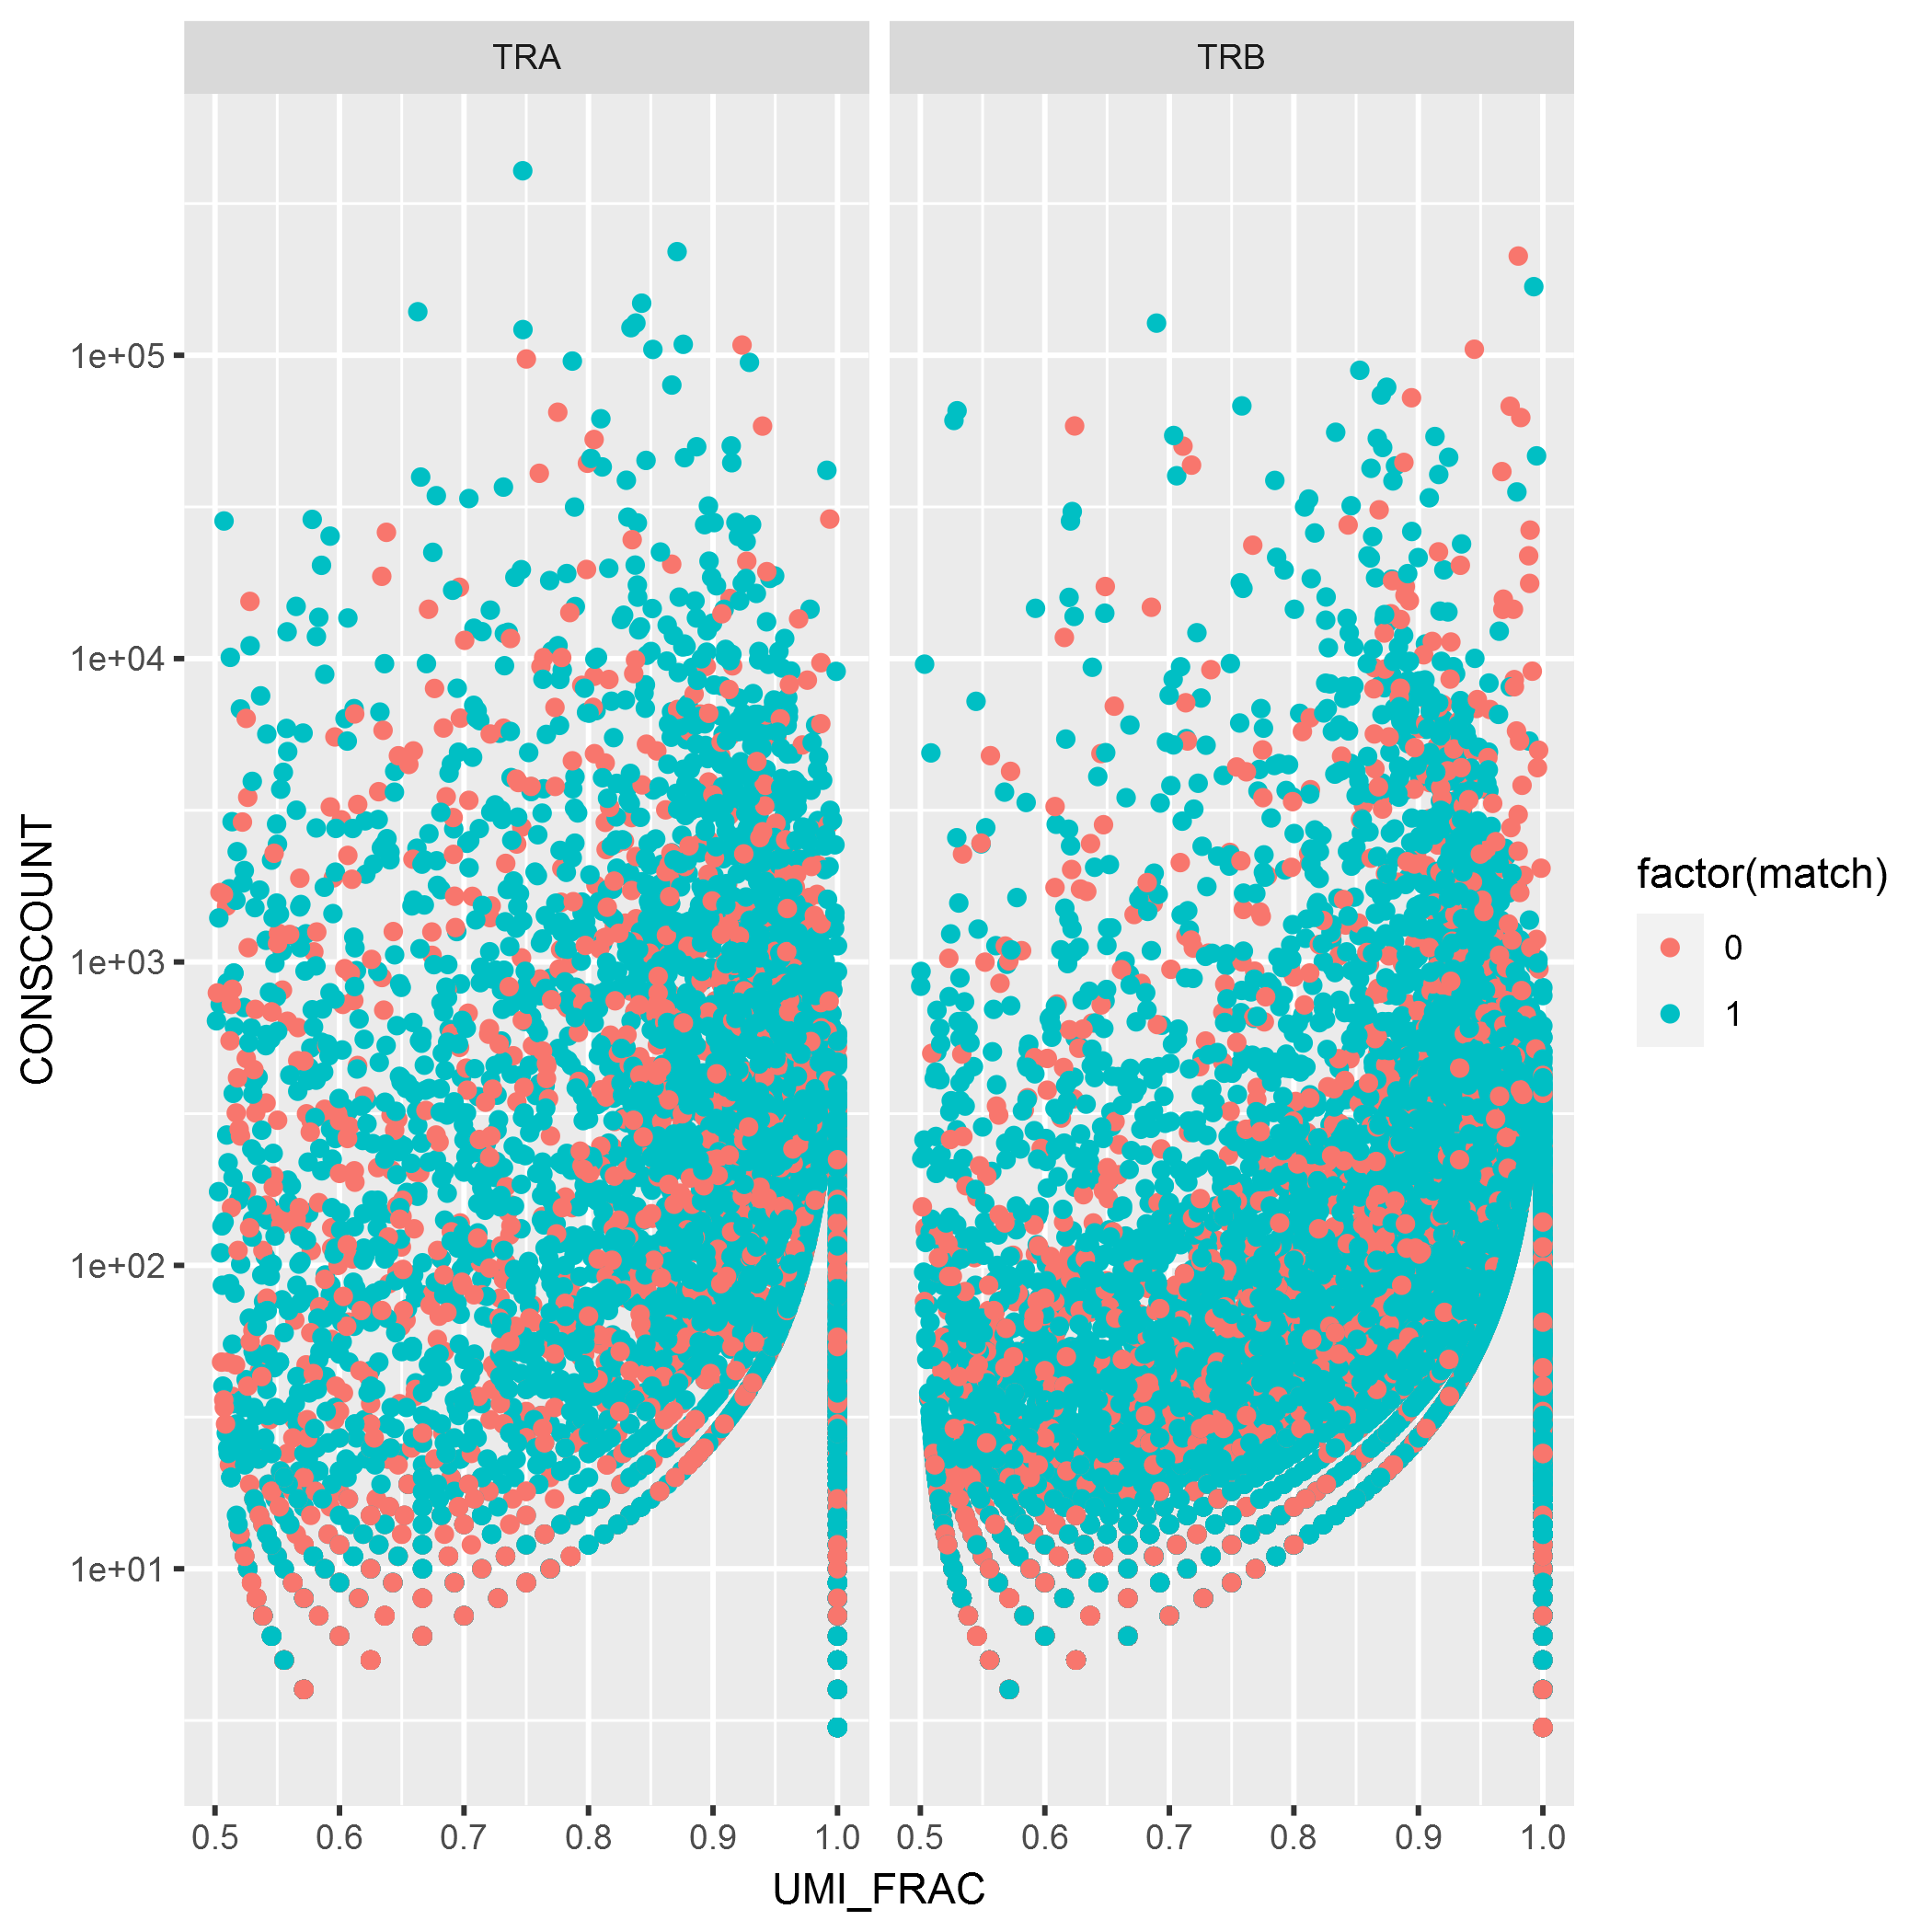

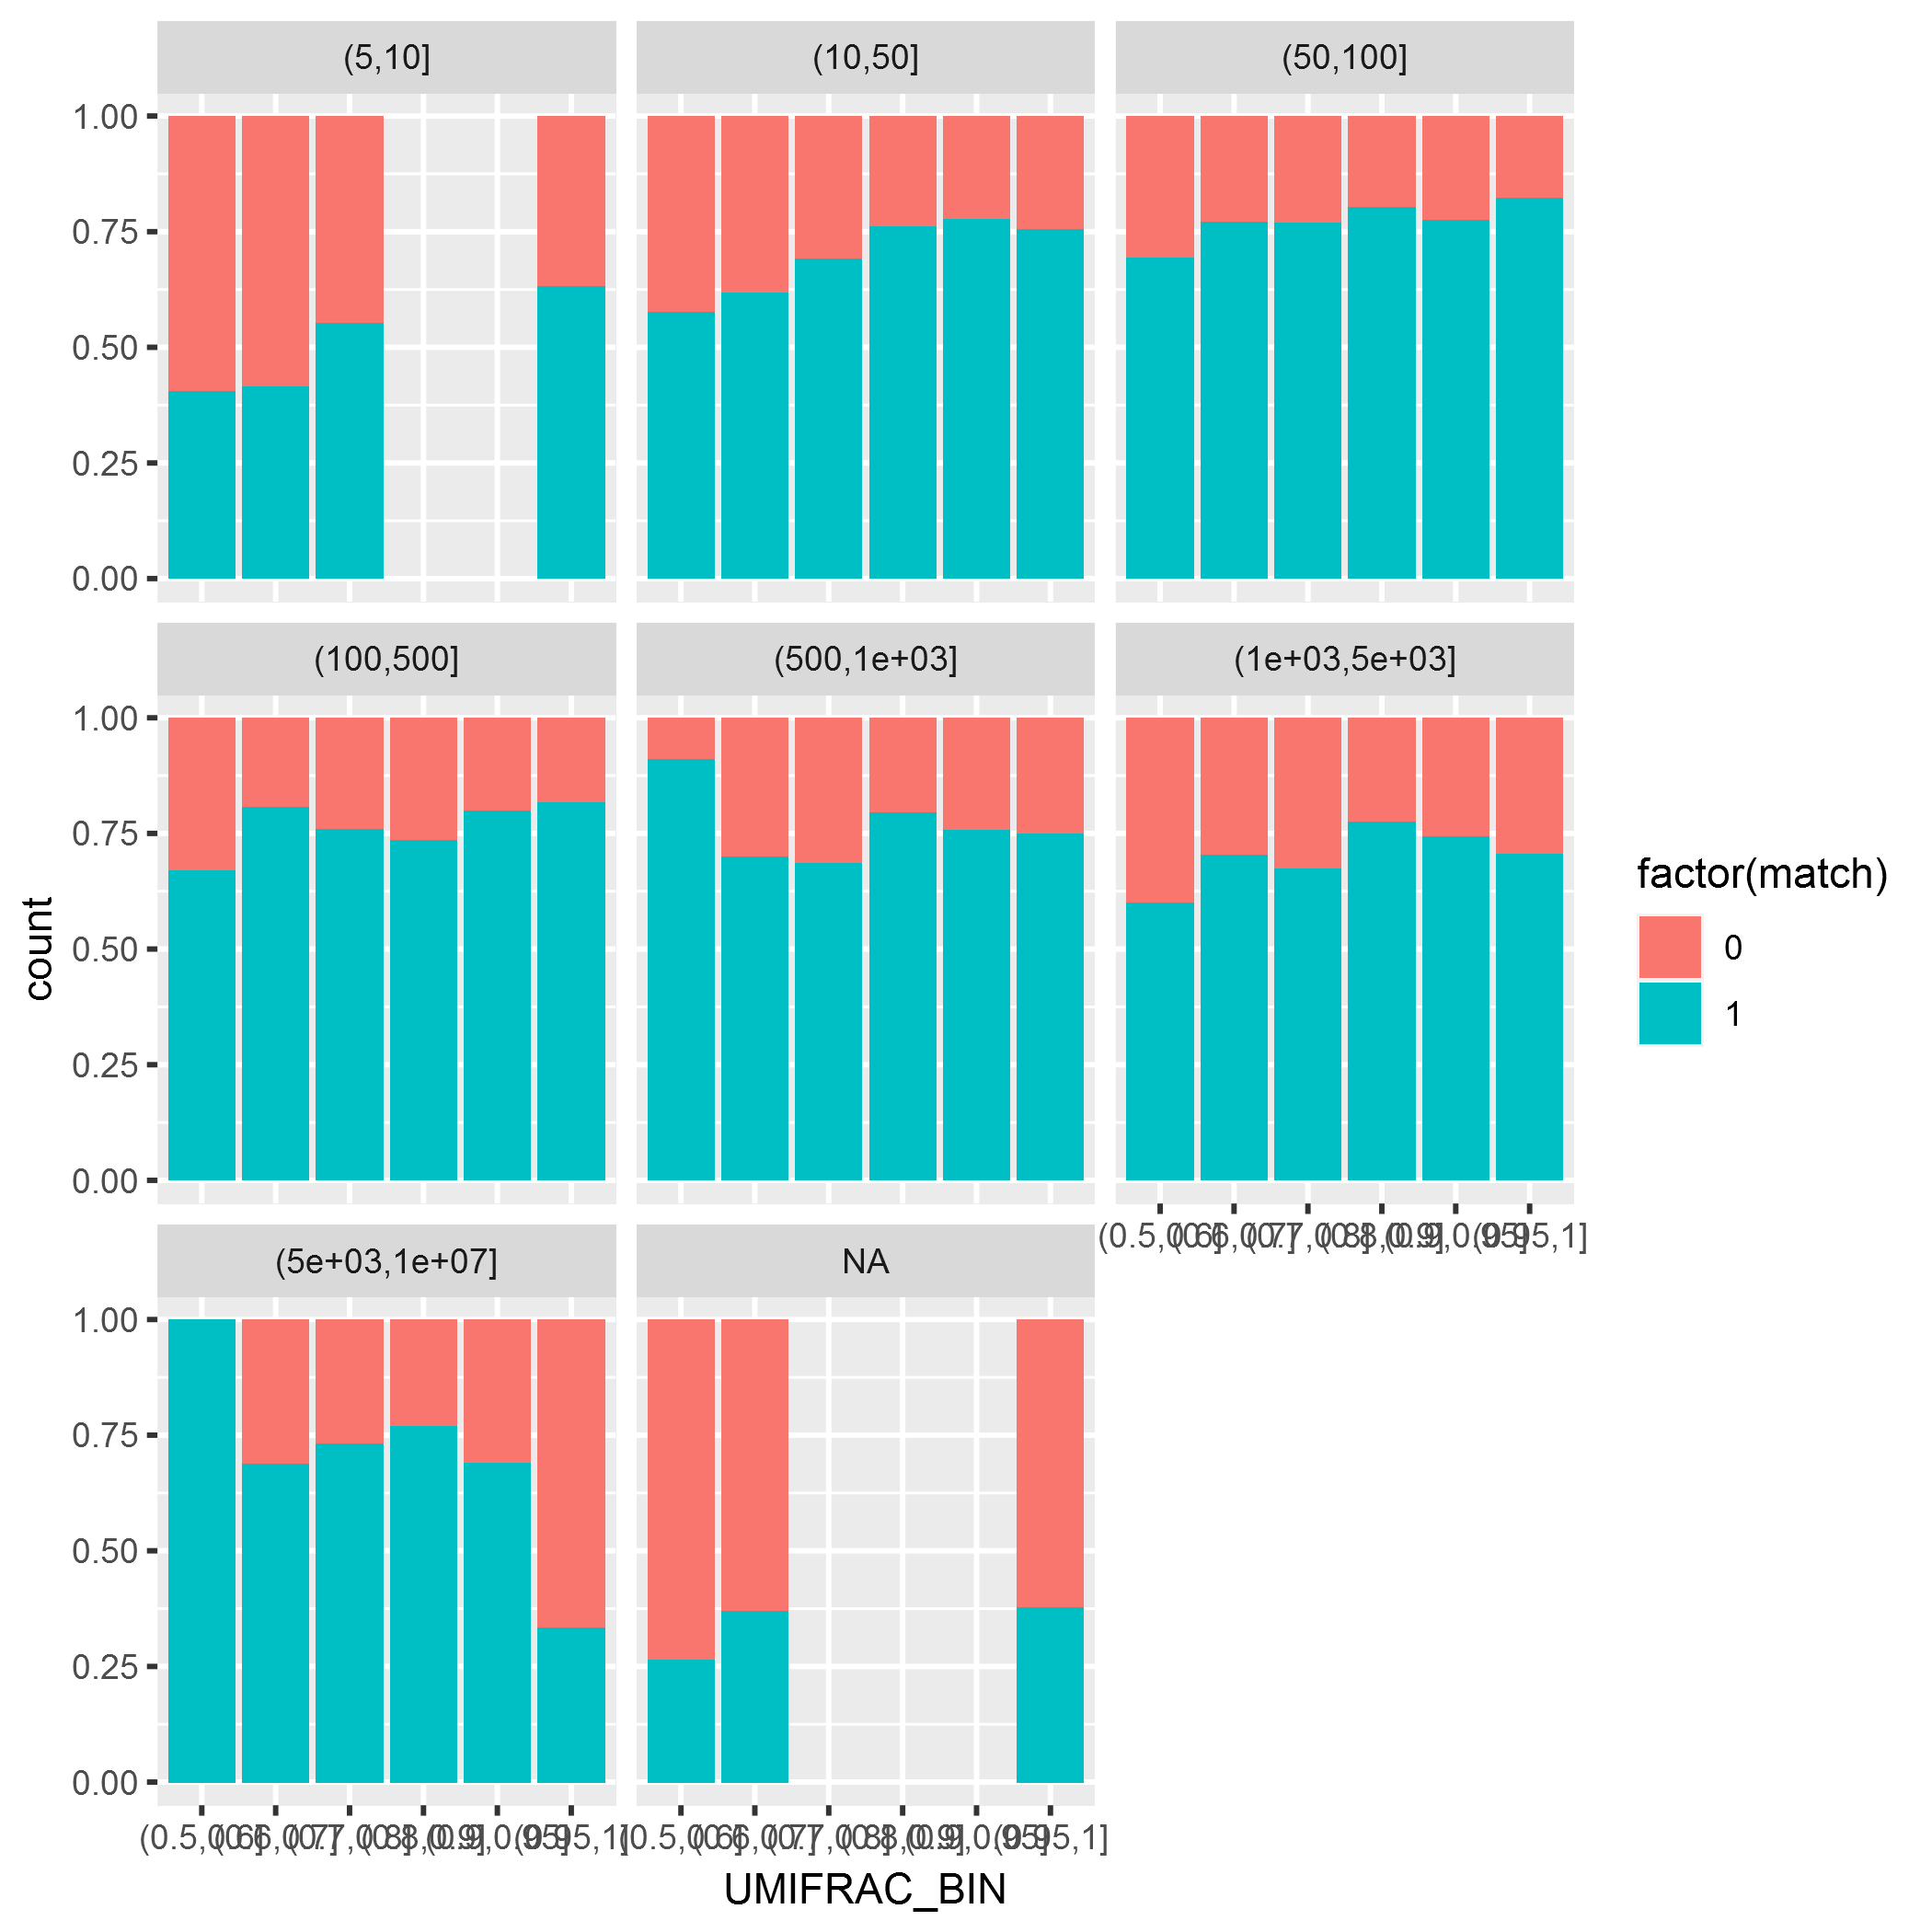

In [13]:

matches = data %>% ungroup() %>% filter(BC %in% seurat@meta.data$bc, (UMI_FRAC > .5))
mode= function(x) {
    ret = NA
    if (length(x) > 0){
    tab = table(x)
    tab = tab[order(tab, decreasing = TRUE)]
    ret = names(tab)[1]
        }
    as.character(ret)
}
options(repr.plot.res = 300)
matches = matches %>% group_by(BC, LOCUS) %>% mutate(n = n(), top = mode(JUNCTION), match = as.numeric(JUNCTION == top)) %>% filter(n > 2)

ggplot(matches %>% filter(LOCUS %in% c('TRA', 'TRB')), aes(x = UMI_FRAC, y = CONSCOUNT, color = factor(match))) + geom_point() + facet_wrap('LOCUS') + scale_y_log10()
matches$UMIFRAC_BIN = cut(matches$UMI_FRAC, c(.5, .6, .7, .8, .9, .95, 1))
matches$count_bin = cut(matches$CONSCOUNT, c(5, 10, 50, 100, 500, 1000, 5000, 10000000))
ggplot(matches %>%filter(LOCUS == 'TRB'),  aes(x = UMIFRAC_BIN, fill = factor(match))) + geom_bar(position = 'fill') + facet_wrap('count_bin')

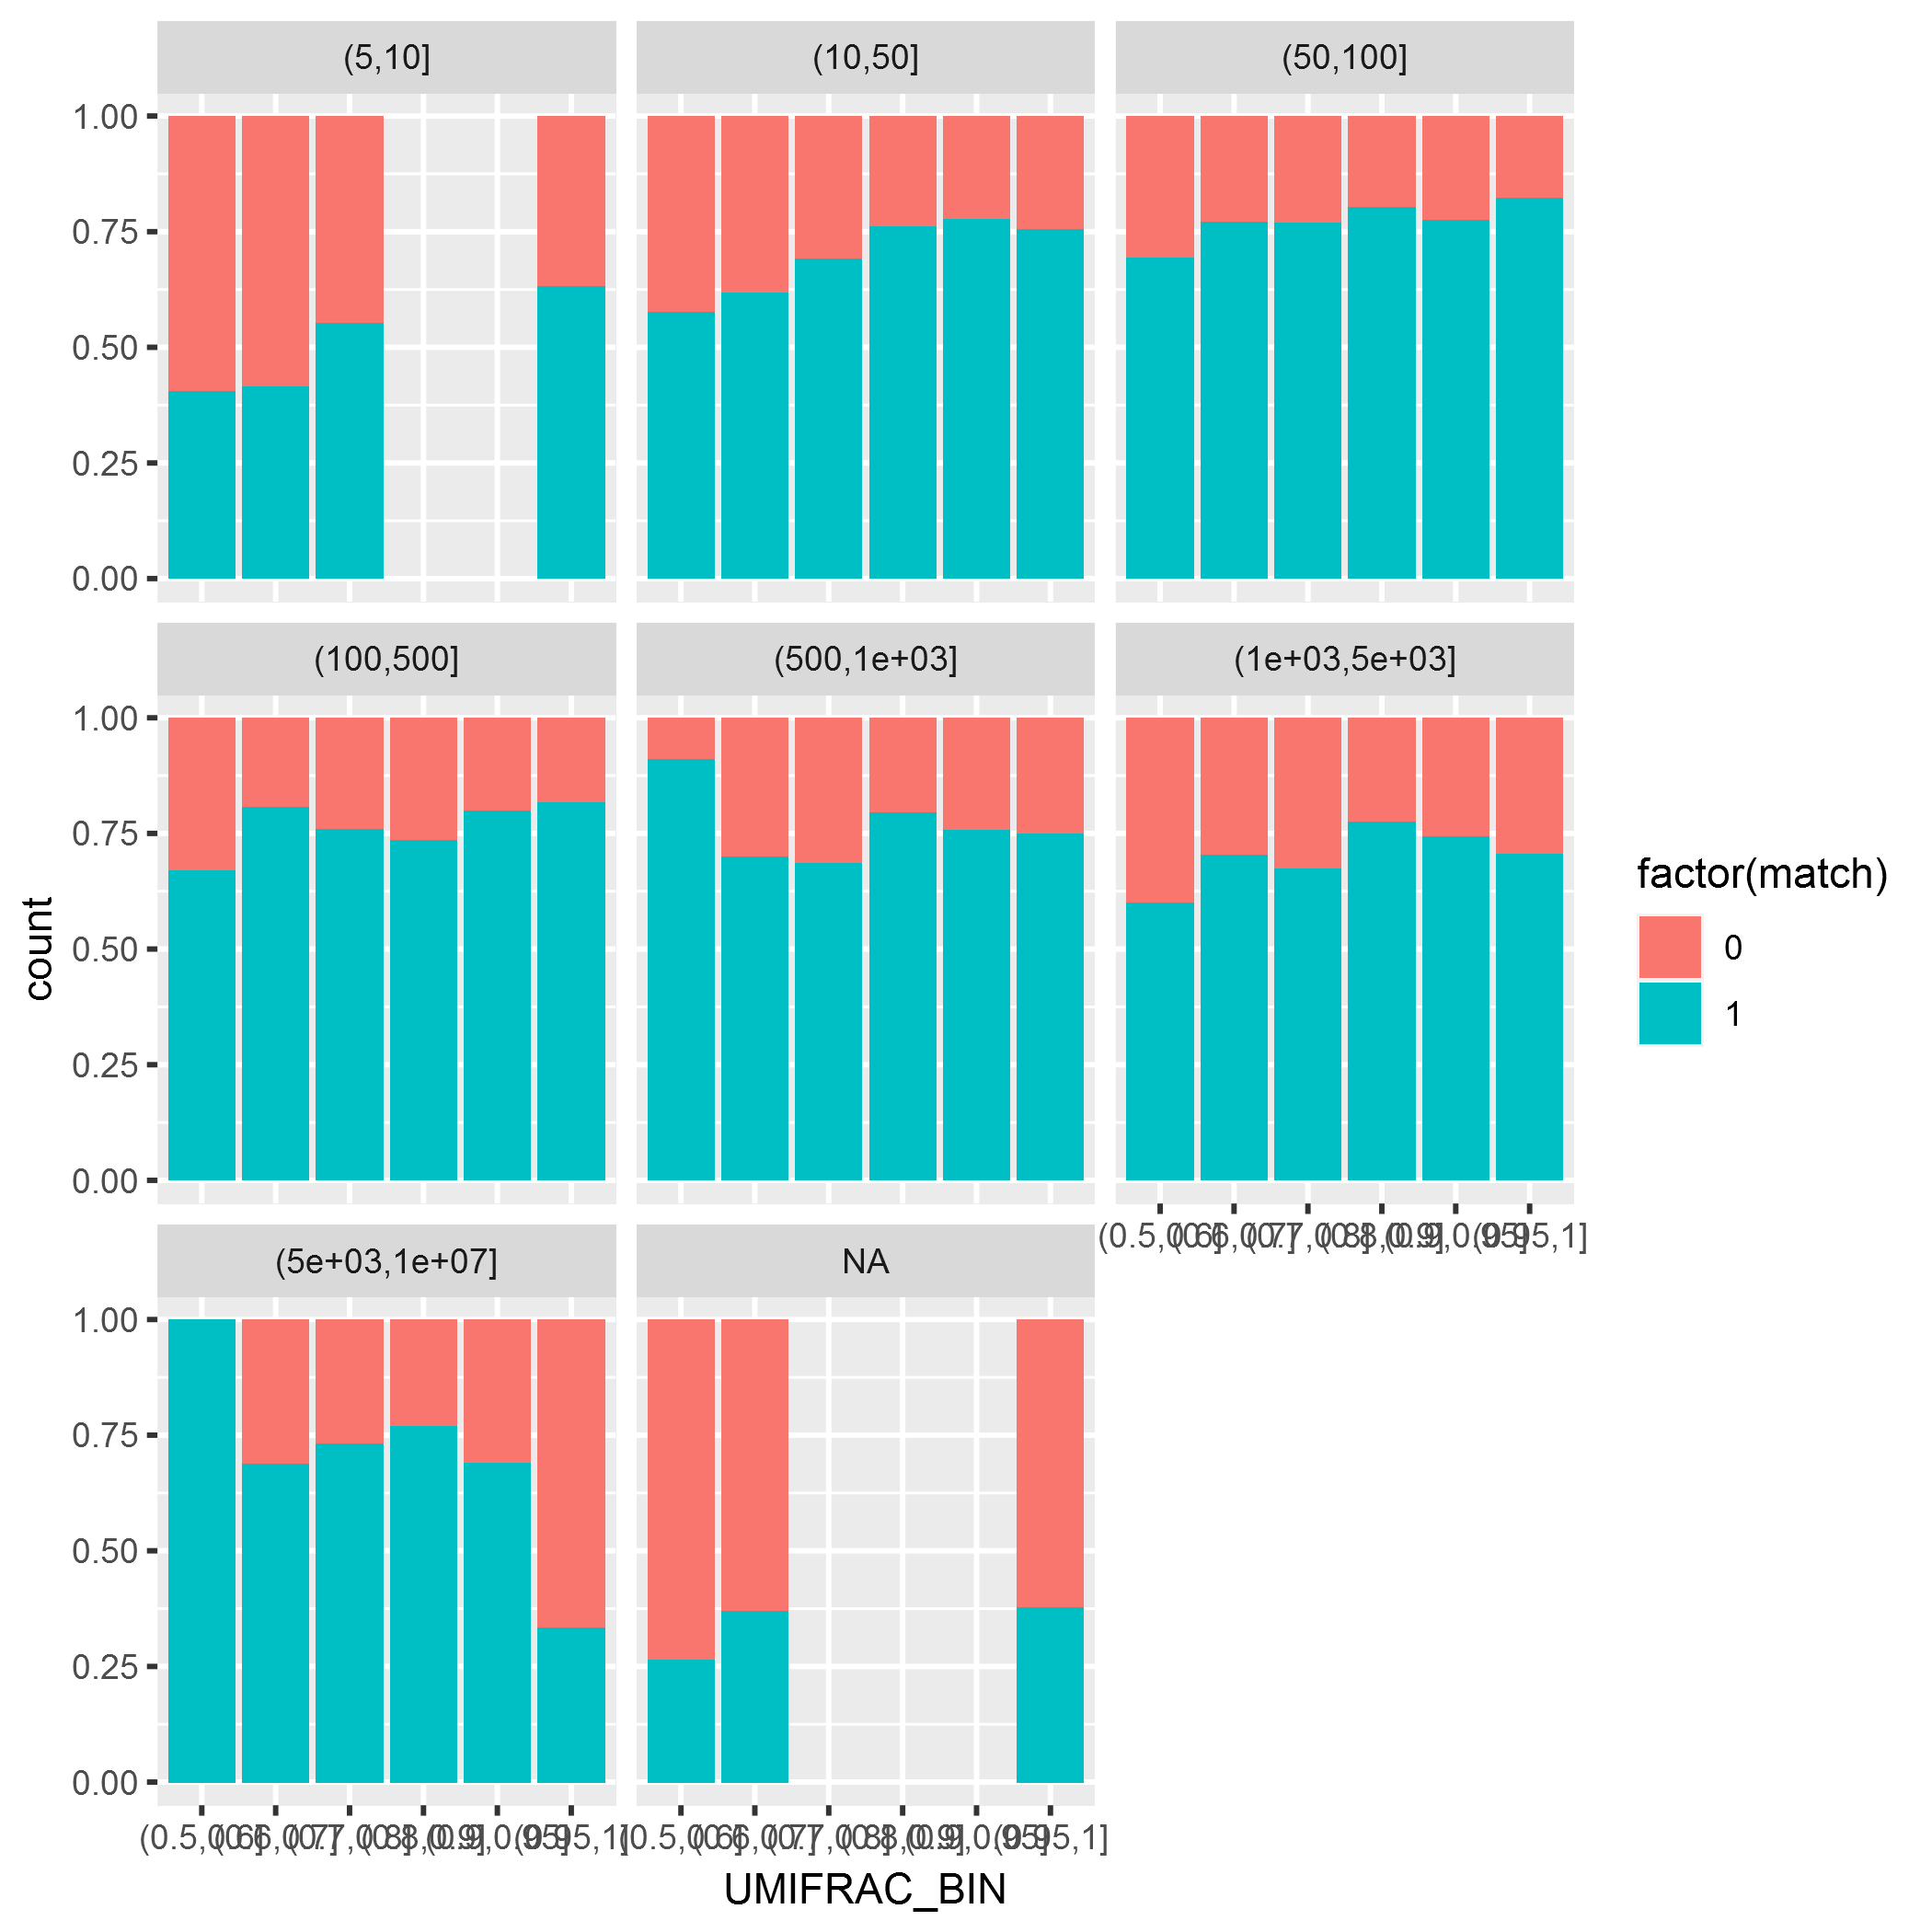

In [14]:
ggplot(matches %>%filter(LOCUS == 'TRB'),  aes(x = UMIFRAC_BIN, fill = factor(match))) + geom_bar(position = 'fill') + facet_wrap('count_bin')

[1] 29578    66


         0          1          2          3 
0.57429599 0.10808868 0.23355303 0.08406231 

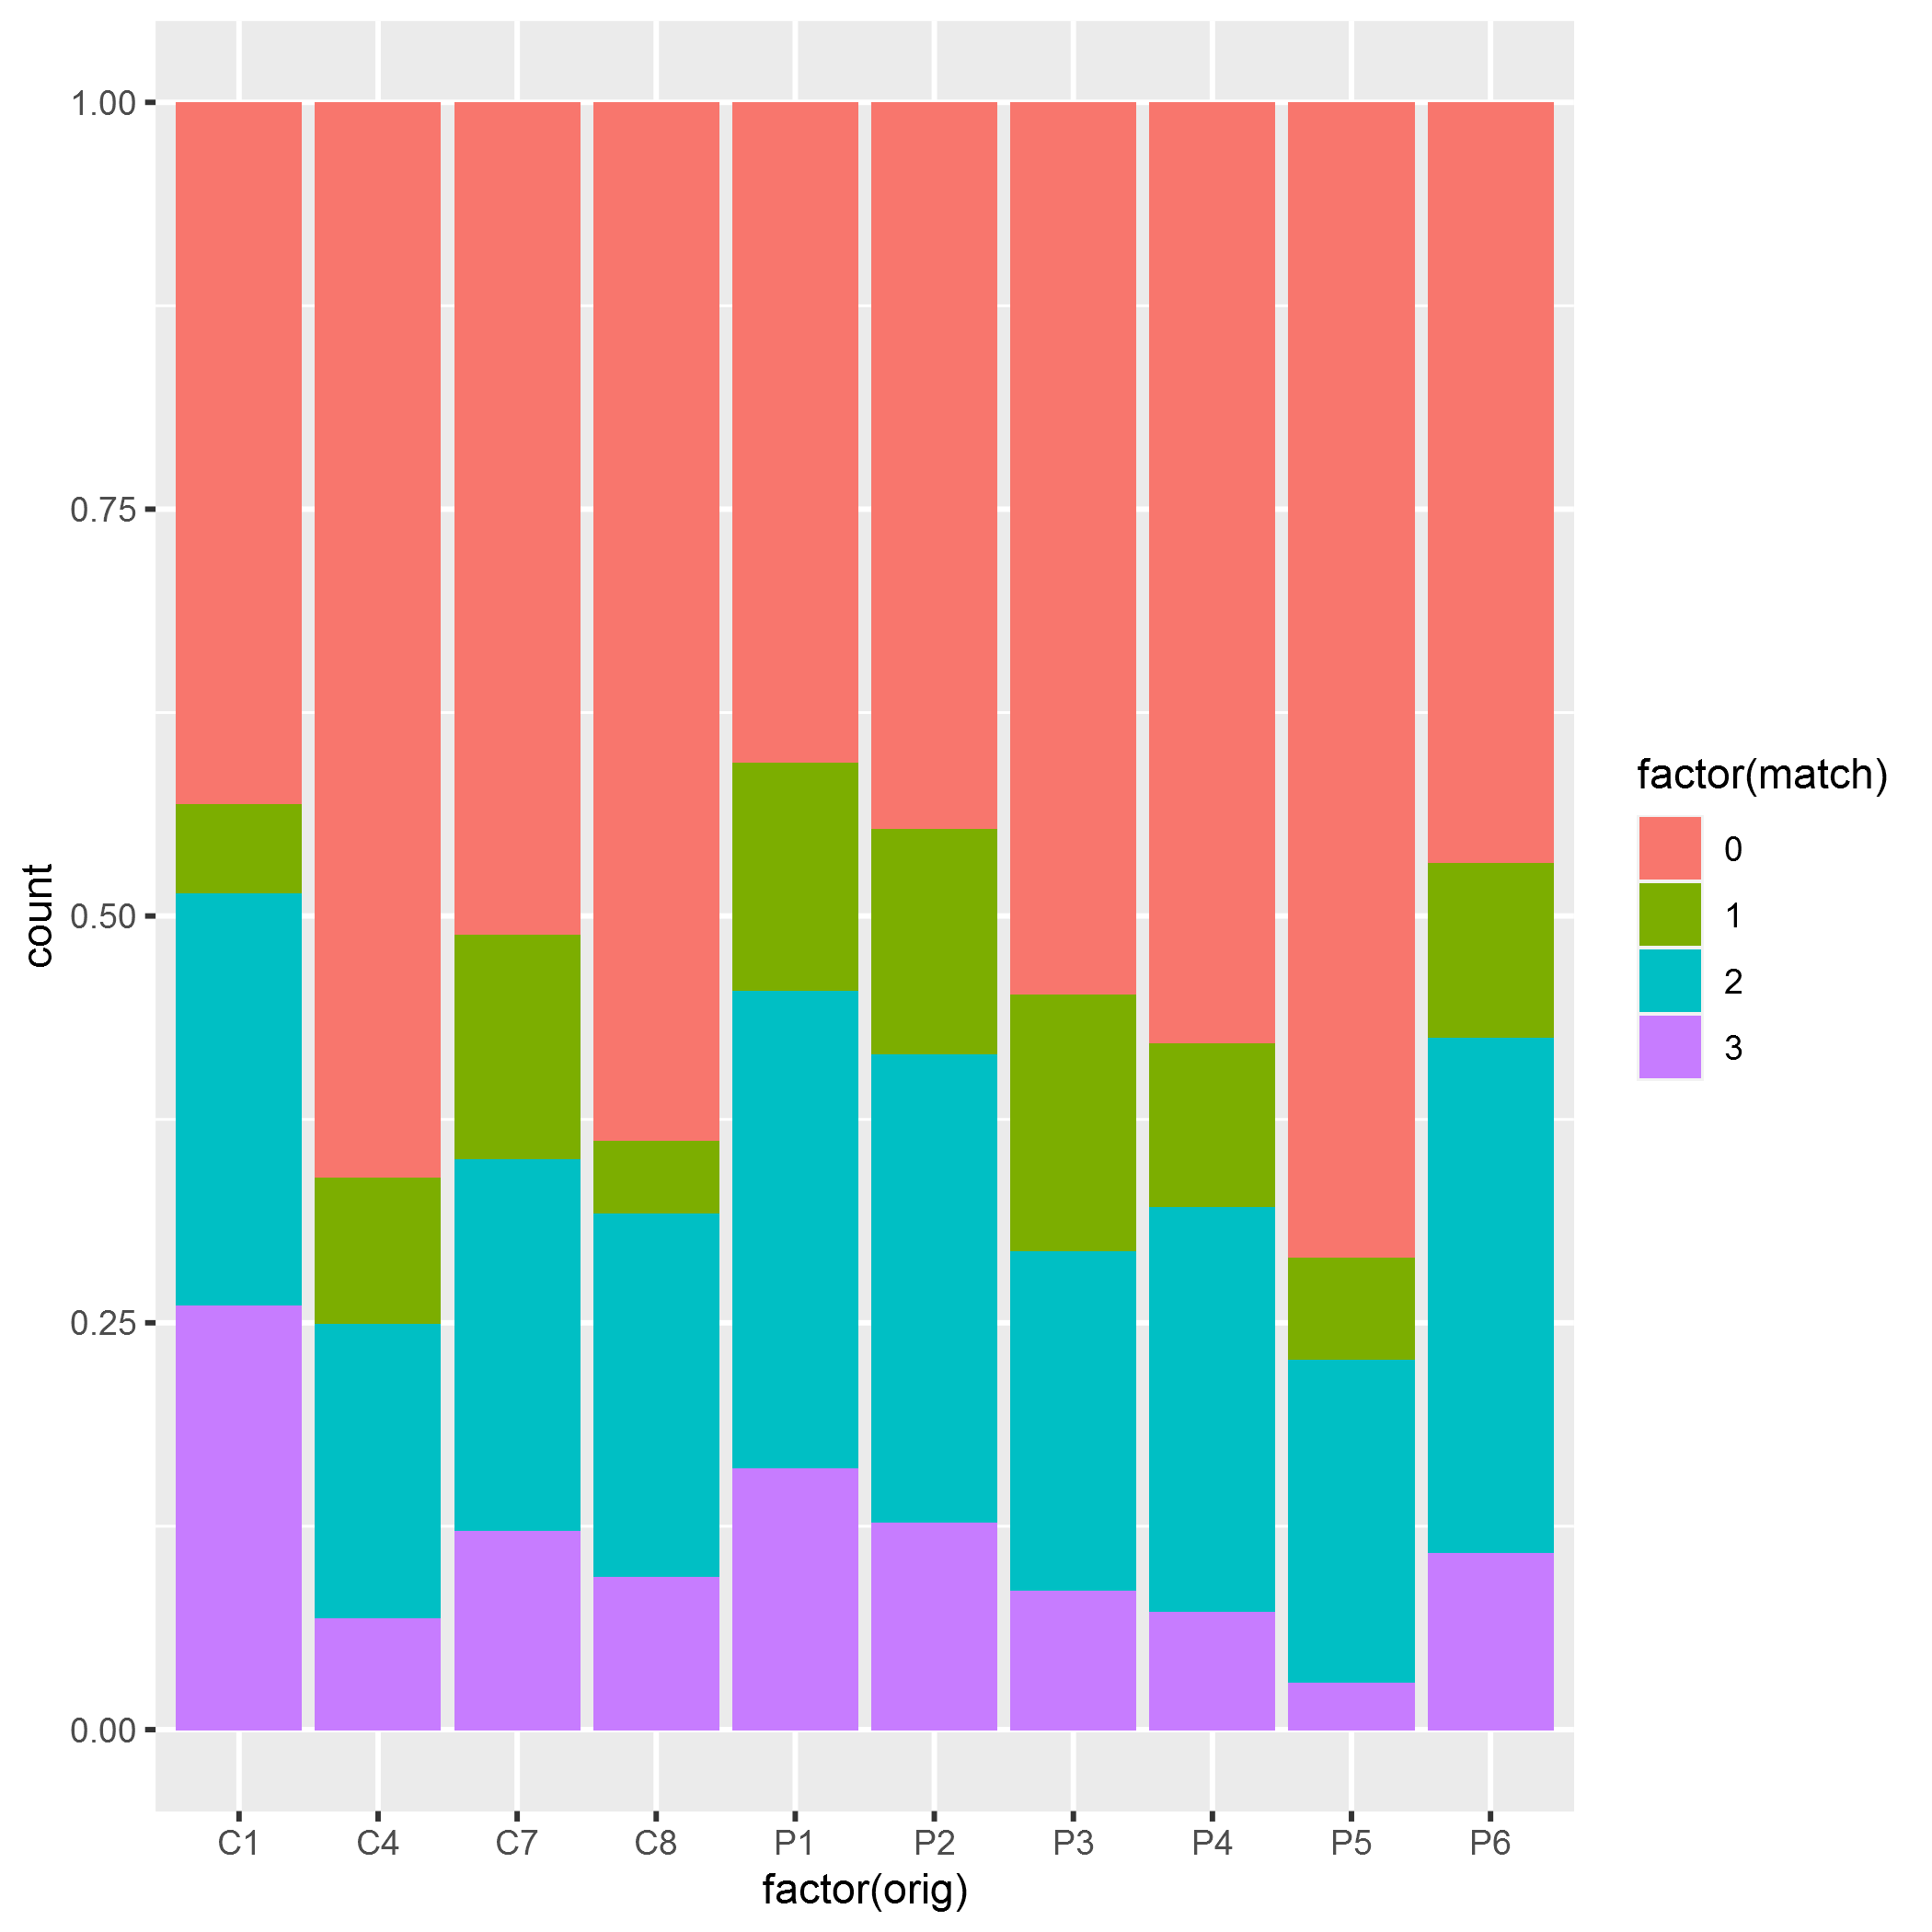

In [15]:
options(repr.plot.res = 300)
matches = data %>% ungroup() %>% filter(BC %in% seurat@meta.data$bc, CONSCOUNT > 10, !AMBIG, UMI_FRAC > 0.7)
dim(matches)
metadata = seurat@meta.data

metadata$matchedB = as.numeric(metadata$bc %in% matches$BC[matches$LOCUS == 'TRB'])
metadata$matchedA = as.numeric(metadata$bc %in% matches$BC[matches$LOCUS == 'TRA'])
metadata$match = 2*metadata$matchedB + 1*metadata$matchedA
table(metadata$match)/length(metadata$match)
ggplot(metadata %>% filter(n_genes > 300), aes(x = factor(orig), fill = factor(match))) + geom_bar(position = 'fill') 

In [16]:
library(alakazam)

matches$CDR3 = translateDNA(matches$JUNCTION)
matches$TopVregion = matches$V_CALL
matches$TopJregion = matches$J_CALL
matches$nReads = matches$CONSCOUNT
matches$CDR3nuc =matches$JUNCTION
head(matches$CDR3)


Warning message:
"package 'alakazam' was built under R version 4.1.3"
As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.



[1] "CATDTNAYKVIF"   "CASGGLGEQYF"    "CATDTNAYKVIF"   "CASGDRYEQYF"   
[5] "CASSFGGGEDTQYF" "CATSASSGSWQLIF"

In [17]:
barcode_summary = matches %>% group_by(LOCUS, BC, V_CALL, JUNCTION) %>% mutate(nUMI = n(), nReads = sum(CONSCOUNT)) %>% group_by(LOCUS, BC) %>% mutate(nUMI_total = n(), nReads_total = sum(CONSCOUNT)) %>% 
mutate(nUMI_FRAC = nUMI /nUMI_total, read_frac = nReads/nReads_total) %>% arrange(desc(nUMI_FRAC), desc(read_frac))

trb = barcode_summary %>% filter(LOCUS == 'TRB') %>% group_by(BC) %>% arrange(desc(nUMI_FRAC), desc(read_frac)) %>% slice(1)
tra = barcode_summary %>% filter(LOCUS == 'TRA') %>% group_by(BC) %>% arrange(desc(nUMI_FRAC), desc(read_frac)) %>% mutate(row = row_number())
second_alpha = tra %>% filter(row ==2)
tra = tra %>% filter(row ==1)


In [18]:
trb = trb %>% rename(TRB_CDR3 = CDR3, TRBV = V_CALL, TRBJ = J_CALL, nUMI_B = nUMI_total, nUMI_FRAC_B = nUMI_FRAC, nRead_B = nReads, nReads_total_B = nReads_total, TRB_nuc = JUNCTION) %>% 
select(BC, TRB_CDR3,TRB_nuc, TRBV, TRBJ, nUMI_B, nUMI_FRAC_B, nRead_B, nReads_total_B)
tra = tra %>% rename(TRA_CDR3 = CDR3, TRAV = V_CALL, TRAJ = J_CALL, nUMI_A = nUMI_total, nUMI_FRAC_A = nUMI_FRAC, nRead_A = nReads, nReads_total_A = nReads_total, TRA_nuc = JUNCTION) %>% 
select(BC, TRA_CDR3, TRA_nuc, TRAV, TRAJ, nUMI_A, nUMI_FRAC_A, nRead_A, nReads_total_A)
second_alpha = second_alpha %>% rename(TRA.2_CDR3 = CDR3, TRAV.2 = V_CALL, TRAJ.2 = J_CALL, nUMI_A2 = nUMI_total, nUMI_FRAC_A2 = nUMI_FRAC, nRead_A2 = nReads, TRA.2_nuc = JUNCTION) %>%
select(BC, TRA.2_CDR3, TRAV.2, TRAJ.2, nUMI_A2, nUMI_FRAC_A2, nRead_A2,TRA.2_nuc)

In [19]:
seurat@meta.data$cellname =rownames(seurat@meta.data)
seurat@meta.data$BC = seurat@meta.data$bc
seurat$BC[seurat$BC %in% duplicated(seurat$bc)] = NA

Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.1.3"
Attaching sp



In [20]:
tcr_metadata = merge(seurat@meta.data, trb, by.x = 'BC', all.x = TRUE) 
tcr_metadata = merge(tcr_metadata, tra, by.x = 'BC', all.x = TRUE) 
tcr_metadata = merge(tcr_metadata, second_alpha, by.x = 'BC', all.x = TRUE) 

dim(tcr_metadata)
head(tcr_metadata)

[1] 33380    43

,BC,orig,bc,n_genes,n_counts,leiden,id,location,tissue,treatment,...,nUMI_FRAC_A,nRead_A,nReads_total_A,TRA.2_CDR3,TRAV.2,TRAJ.2,nUMI_A2,nUMI_FRAC_A2,nRead_A2,TRA.2_nuc
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>
1,AAAAAAACATAT,P1,AAAAAAACATAT,469,1131,4,P1AAAAAAACATAT,Flank,Tumor,CBT,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,AAAAAAACTTAA,P4,AAAAAAACTTAA,585,955,2,P4AAAAAAACTTAA,Flank,Spleen,CBT,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,AAAAAAAGAATC,P6,AAAAAAAGAATC,551,1172,1,P6AAAAAAAGAATC,Flank,Spleen,CBT,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,AAAAAAAGGGCT,P4,AAAAAAAGGGCT,659,1041,4,P4AAAAAAAGGGCT,Flank,Spleen,CBT,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,AAAAAACCAGTC,P2,AAAAAACCAGTC,234,669,2,P2AAAAAACCAGTC,Flank,dLN,CBT,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,AAAAAACTCCTT,P5,AAAAAACTCCTT,362,1430,1,P5AAAAAACTCCTT,Flank,Spleen,CBT,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
rownames(tcr_metadata) = tcr_metadata$cellname
tcr_metadata$trbid = paste0(tcr_metadata$letter,tcr_metadata$hash, tcr_metadata$TRB_nuc)
tcr_metadata$traid = paste0(tcr_metadata$letter,tcr_metadata$hash, tcr_metadata$TRA_nuc)

tcr_metadata$trbid[is.na(tcr_metadata$TRB_CDR3)] =NA
tcr_metadata$traid[is.na(tcr_metadata$TRA_CDR3)] =NA

In [22]:
tab = table(tcr_metadata$trbid)
tab = tab[order(tab, decreasing = TRUE)]
head(tab)


         PHTO3TGTGCCAGCGGGGGACTTGGAGAACAGTACTTC 
                                            604 
PHTO2TGTGCCAGCGGTGGCGGGACAGGGAACTCCGACTACACCTTC 
                                            596 
PHTO1TGTGCCAGCGGTGGAGGGACAGGAAACTCCGACTACACCTTC 
                                            413 
PHTO4TGTGCCAGCGGTGGTGGGACAGGGAACTCCGACTACACCTTC 
                                            306 
         PHTO1TGTGCCAGCGGCGGACAGGGGGAACAGTACTTC 
                                            256 
         PHTO3TGTGCCAGCGGTGCACAGGGGGAACAGTACTTC 
                                            226 

In [23]:
library(stringr)
tcr_metadata$TRBV = sapply(tcr_metadata$TRBV, function(x) str_split(x, fixed('*'))[[1]][1])
tcr_metadata$TRAV = sapply(tcr_metadata$TRAV, function(x) str_split(x, fixed('*'))[[1]][1])
tcr_metadata$TRAJ = sapply(tcr_metadata$TRAJ, function(x) str_split(x, fixed('*'))[[1]][1])
tcr_metadata$TRBJ = sapply(tcr_metadata$TRBJ, function(x) str_split(x, fixed('*'))[[1]][1])
                           
tcr_metadata$TRAV.2 = sapply(tcr_metadata$TRAV.2, function(x) str_split(x, fixed('*'))[[1]][1])
tcr_metadata$TRAJ.2 = sapply(tcr_metadata$TRAJ.2, function(x) str_split(x, fixed('*'))[[1]][1])

In [24]:
library(dplyr)
mode = function(x) {
    ret = NA
    x = x[!is.na(x)]
    x = table(x)
    x = x[order(x, decreasing = TRUE)]
    if (length(x) > 0) {
        ret = names(x)[1]
    }
    as.character(ret)
}

tcr_metadata$TRAV = as.character(tcr_metadata$TRAV)
tcr_metadata$TRAJ = as.character(tcr_metadata$TRAJ)



trbs = tcr_metadata %>% filter(!is.na(TRB_CDR3)) %>%
group_by(letter, hash, trbid, TRB_nuc) %>% summarize(TRBV = mode(TRBV), TRBJ = mode(TRBJ), CDR3b = mode(TRB_CDR3), 
                                                             TRAV = mode(TRAV), TRAJ = mode(TRAJ), CDR3a = mode(TRA_CDR3), CDR3a_nuc = mode(TRA_nuc),                                                                                                                    
                                                             ncell = n()) %>% arrange(desc(ncell)) %>% mutate(alphaid = paste0(letter, hash, CDR3a_nuc))

tra_orphans = tcr_metadata %>% filter(is.na(TRB_CDR3), !is.na(TRA_CDR3)) %>% mutate(alpha_id = paste0(letter,  hash, TRA_nuc)) %>% 
group_by(letter, alpha_id,  hash, TRA_CDR3) %>% summarize(ncell = n(), TRAV = mode(TRAV), TRAJ = mode(TRAJ), TRA_nuc = mode(TRA_nuc)) %>% dplyr::rename(CDR3a = TRA_CDR3, CDR3a_nuc = TRA_nuc)

stillno = c()
for (i in 1:dim(tra_orphans)[1]) {
    id = tra_orphans$alpha_id[i]
    if (id %in% trbs$alphaid) {
        row = which(trbs$alphaid == id)
        trbs$ncell[row[1]] = trbs$ncell[row[1]] + tra_orphans$ncell[i]
    }
    else {
        stillno = c(stillno, i)
    }
}

trbs = merge(trbs, tra_orphans[stillno,], all = TRUE) %>% dplyr::rename(CDR3b_nuc = TRB_nuc) %>% select(-alphaid, -alpha_id) %>%
select(letter,  hash, TRBV, CDR3b, CDR3b_nuc, TRBJ, TRAV, CDR3a, CDR3a_nuc, TRAJ, ncell) 
library(stringr)

trbs = trbs %>% group_by(letter, hash) %>% mutate(row = row_number(), clone_id = paste0(letter,'_', hash, '_', row), 
                                                 trbid = paste0(letter, hash, CDR3b_nuc), traid = paste0(letter, hash, CDR3a_nuc))


`summarise()` has grouped output by 'letter', 'hash', 'trbid'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'letter', 'alpha_id', 'hash'. You can override using the `.groups` argument.


In [25]:
tcr_metadata$clone_id = NA
beta_ind = which(!is.na(tcr_metadata$trbid))
tcr_metadata$clone_id[beta_ind] = trbs$clone_id[match(tcr_metadata$trbid[beta_ind], trbs$trbid)]

alpha_ind = which(!is.na(tcr_metadata$traid) & is.na(tcr_metadata$trbid))
tcr_metadata$clone_id[alpha_ind] = trbs$clone_id[match(tcr_metadata$traid[alpha_ind], trbs$traid)]



In [26]:
saveRDS(tcr_metadata, 'TCR_metadata_withnaive.RDS')